# Esercizio 8 - Validazione, Overfitting e Generalizzazione

## Obiettivi
- Comprendere la differenza tra errore di training e errore di test
- Capire cosa significa overfitting e perche e il problema centrale del ML
- Padroneggiare le tecniche di validazione: hold-out split e cross-validation
- Studiare il trade-off bias/variance e la sua relazione con la complessita del modello
- Saper diagnosticare underfitting e overfitting dai risultati

## Prerequisiti
- Esercizio 5: Scikit-Learn base (train_test_split, fit, predict)
- Esercizio 6-7: Modelli lineari e regolarizzazione
- Concetti: accuracy, funzione di perdita, iperparametri

## Indice
1. SEZIONE 1 - Teoria: Overfitting, Bias/Variance, Validazione
2. SEZIONE 2 - Mappa Mentale
3. SEZIONE 3 - Notebook Dimostrativo
4. SEZIONE 4 - Metodi Spiegati
5. SEZIONE 5 - Glossario
6. SEZIONE 6 - Errori Comuni
7. SEZIONE 7 - Conclusione
8. SEZIONE 8 - Checklist di Verifica
9. SEZIONE 9 - Changelog

# SEZIONE 1 - Teoria: Overfitting, Bias/Variance, Validazione

---

## 1.1 Cos'e la Generalizzazione

Un modello **generalizza** quando riesce a fare previsioni accurate su dati che non ha mai visto durante l'addestramento.

| Concetto | Definizione |
|----------|-------------|
| **Training Error** | Errore sui dati usati per l'addestramento |
| **Test Error** | Errore sui dati mai visti (quello che ci interessa) |
| **Generalizzazione** | Capacita di avere basso test error |

Punto chiave: L'accuracy sul training non basta perche il modello puo semplicemente memorizzare.

---

## 1.2 I Tre Regimi

| Regime | Training Error | Test Error | Problema |
|--------|---------------|------------|----------|
| **Underfitting** | Alto | Alto | Modello troppo semplice |
| **Good Fit** | Medio | Simile al training | Generalizzazione ottimale |
| **Overfitting** | Basso (~0) | Molto piu alto | Modello troppo complesso |

---

## 1.3 Overfitting - Il Problema Centrale

L'**overfitting** si verifica quando il modello si adatta troppo ai dati di training, catturando anche il rumore.

$$y = f(x) + \epsilon$$

dove $f(x)$ e il segnale (pattern vero) e $\epsilon$ e il rumore.

**Cause dell'overfitting:**
- Modello troppo flessibile (troppi parametri)
- Dataset troppo piccolo rispetto alla complessita
- Mancanza di regolarizzazione
- Feature non informative

**Come si manifesta nei diversi modelli:**
| Modello | Quando overfitta |
|---------|-----------------|
| Decision Tree | max_depth troppo alto |
| k-NN | k troppo piccolo (k=1 memorizza tutto) |
| Modelli lineari | Troppe feature, no regolarizzazione |

---

## 1.4 Hold-out Validation (Train/Test Split)

La tecnica piu semplice per valutare la generalizzazione.

```
Dataset completo
       |
   +---+---+
   |       |
Training  Test
(70-80%) (20-30%)
```

**Regole fondamentali:**
1. Split PRIMA di qualsiasi preprocessing
2. `fit()` solo sul training, `transform()` su entrambi
3. Il test set e "sacro" - mai usarlo per decisioni sul modello

**Data Leakage**: quando informazioni dal test contaminano il training.
- Esempio: scaling prima dello split (calcola media/std su tutti i dati)
- Conseguenza: performance gonfiate, fallimento in produzione

---

## 1.5 Cross-Validation K-Fold

Risolve il problema della dipendenza dallo split singolo.

**Procedura (K=5):**
```
Fold 1: [TEST] [Train] [Train] [Train] [Train]
Fold 2: [Train] [TEST] [Train] [Train] [Train]
Fold 3: [Train] [Train] [TEST] [Train] [Train]
Fold 4: [Train] [Train] [Train] [TEST] [Train]
Fold 5: [Train] [Train] [Train] [Train] [TEST]
```

$$\text{CV Score} = \frac{1}{K} \sum_{i=1}^{K} \text{score}_i$$

**Vantaggi:**
- Ogni esempio viene usato una volta come test
- Stima piu stabile (media di K valori)
- Si ottiene una misura di incertezza (std)

**Scelta di K:**
- K=5 o K=10: standard, buon equilibrio
- K=n (Leave-One-Out): solo per dataset molto piccoli

---

## 1.6 Bias/Variance Trade-off

L'errore di generalizzazione si decompone in:

$$\text{Test Error} = \text{Bias}^2 + \text{Variance} + \text{Rumore irriducibile}$$

| Componente | Definizione | Ridotto da |
|------------|-------------|------------|
| **Bias** | Errore sistematico (assunzioni troppo forti) | Modelli piu complessi |
| **Variance** | Sensibilita al training set | Piu dati, regolarizzazione |
| **Rumore** | Variabilita intrinseca nei dati | Non eliminabile |

**Il Trade-off:**
| Complessita | Bias | Variance | Rischio |
|-------------|------|----------|---------|
| Bassa | Alto | Bassa | Underfitting |
| Alta | Basso | Alta | Overfitting |
| Ottimale | Medio | Media | Generalizzazione |

---

## 1.7 Diagnostica: Come Riconoscere i Problemi

| Segnale | Diagnosi | Azione |
|---------|----------|--------|
| Train alto, Test alto, gap piccolo | Underfitting | Aumenta complessita |
| Train basso, Test alto, gap grande | Overfitting | Riduci complessita, regolarizza |
| Train medio, Test simile | Good Fit | Modello pronto |
| CV Std alta | Instabilita | Modello troppo complesso per i dati |

**Regola pratica:** Gap (train - test) > 5-10% indica overfitting.

---

## 1.8 Strategie Anti-Overfitting

| Strategia | Come funziona |
|-----------|---------------|
| Ridurre complessita | max_depth minore, k maggiore |
| Regolarizzazione | L1, L2, Elastic Net |
| Piu dati | Se possibile, aumenta training set |
| Ensemble | Random Forest, Gradient Boosting |
| Early stopping | Ferma prima del sovradattamento |

# SEZIONE 2 - Mappa Mentale

```
VALIDAZIONE E GENERALIZZAZIONE
|
+-- PROBLEMA CENTRALE: Overfitting
|   |
|   +-- Definizione: modello memorizza invece di imparare
|   +-- Causa: complessita troppo alta per i dati
|   +-- Segnale: train >> test accuracy
|   +-- Soluzione: regolarizzazione, riduzione complessita
|
+-- DUE TIPI DI ERRORE
|   |
|   +-- Training Error: sempre diminuisce con complessita
|   +-- Test Error: prima diminuisce, poi AUMENTA
|   +-- Obiettivo: minimizzare TEST error
|
+-- TECNICHE DI VALIDAZIONE
|   |
|   +-- Hold-out Split
|   |   +-- 70-80% train, 20-30% test
|   |   +-- Pro: semplice, veloce
|   |   +-- Contro: dipende dallo split
|   |
|   +-- K-Fold Cross-Validation
|       +-- Divide in K parti
|       +-- Ogni parte usata una volta come test
|       +-- Risultato: media +/- std
|       +-- Pro: stabile, usa tutti i dati
|
+-- BIAS/VARIANCE TRADE-OFF
|   |
|   +-- Test Error = Bias^2 + Variance + Rumore
|   +-- Modello semplice: alto bias, bassa variance
|   +-- Modello complesso: basso bias, alta variance
|   +-- Ottimo: equilibrio tra i due
|
+-- DIAGNOSTICA
    |
    +-- Underfitting: train alto, test alto
    +-- Good Fit: train e test simili
    +-- Overfitting: train basso, test alto
    +-- CV Std alta: modello instabile
```

**Flow decisionale:**

```
[Addestra modello]
       |
       v
[Calcola train e test accuracy]
       |
       v
[Gap = train - test]
       |
   +---+---+
   |       |
Gap < 5%  Gap > 10%
   |       |
   v       v
[OK]   [OVERFITTING]
   |       |
   v       v
[Controlla    [Riduci complessita]
accuracy]     [Regolarizza]
              [Aggiungi dati]
```

# SEZIONE 3 - Notebook Dimostrativo

In questa sezione applicheremo i concetti teorici con 5 esercizi pratici:

1. **Curva Training vs Test Error** - Visualizzazione del concetto fondamentale
2. **Hold-out Split e Rilevamento Overfitting** - Confronto modello semplice vs complesso
3. **Cross-Validation K-Fold** - Stima stabile delle performance
4. **Complessita vs Errore** - Decision Tree con profondita crescente
5. **Diagnostica Completa** - Confronto di modelli e scelta del migliore

---

## Esercizio 1: Curva Training vs Test Error (Concettuale)

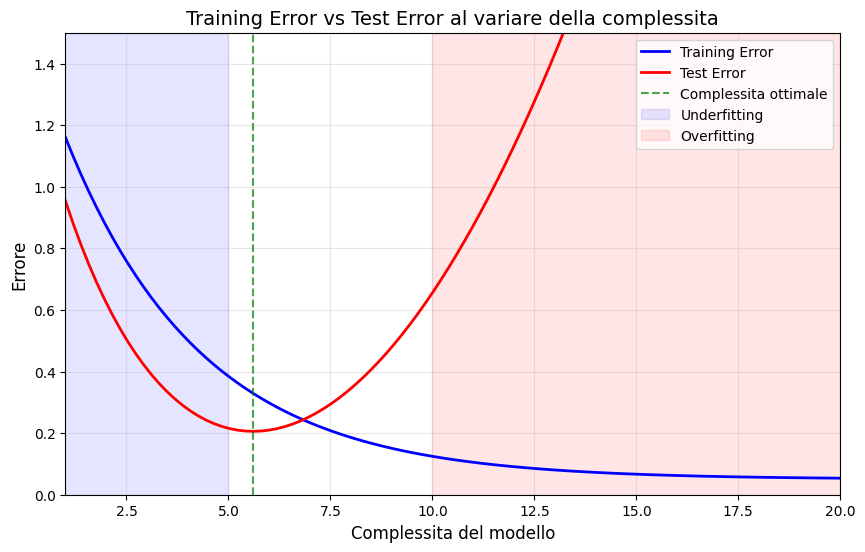

Micro-checkpoint: curva training/test error generata correttamente


In [2]:
# === ESERCIZIO 1: Visualizzazione Training vs Test Error ===
# Perche: mostra il concetto fondamentale della validazione

import numpy as np
import matplotlib.pyplot as plt

# Simuliamo il comportamento tipico
complexity = np.linspace(1, 20, 100)

# Training error: diminuisce sempre con la complessita
train_error = 1.5 * np.exp(-0.3 * complexity) + 0.05

# Test error: prima diminuisce, poi aumenta (forma a U)
test_error = 0.8 * np.exp(-0.5 * complexity) + 0.02 * (complexity - 5)**2 + 0.15

plt.figure(figsize=(10, 6))
plt.plot(complexity, train_error, 'b-', linewidth=2, label='Training Error')
plt.plot(complexity, test_error, 'r-', linewidth=2, label='Test Error')

# Punto ottimale
optimal_idx = np.argmin(test_error)
plt.axvline(x=complexity[optimal_idx], color='green', linestyle='--', alpha=0.7, label='Complessita ottimale')

# Zone
plt.axvspan(1, 5, alpha=0.1, color='blue', label='Underfitting')
plt.axvspan(10, 20, alpha=0.1, color='red', label='Overfitting')

plt.xlabel('Complessita del modello', fontsize=12)
plt.ylabel('Errore', fontsize=12)
plt.title('Training Error vs Test Error al variare della complessita', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(1, 20)
plt.ylim(0, 1.5)
plt.show()

# --- MICRO-CHECKPOINT ---
assert len(train_error) == 100, "train_error deve avere 100 valori"
assert train_error[-1] < train_error[0], "Training error deve diminuire con complessita"
print("Micro-checkpoint: curva training/test error generata correttamente")

---

## Esercizio 2: Hold-out Split e Rilevamento Overfitting

In [3]:
# === ESERCIZIO 2: Hold-out Split e Rilevamento Overfitting ===
# Perche: dimostra come train/test split rivela l'overfitting

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generazione dataset sintetico
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_clusters_per_class=2,
    random_state=42
)

print(f"Dimensione dataset: {X.shape}")
print(f"Distribuzione classi: {np.bincount(y)}")

# PASSO 1: Split PRIMA di qualsiasi preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    stratify=y,        # Mantiene la proporzione delle classi
    random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")

# PASSO 2: Scaling - fit solo sul train!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform sul train
X_test_scaled = scaler.transform(X_test)         # solo transform sul test

# PASSO 3: Addestramento e valutazione di due modelli

# Modello 1: Logistic Regression (modello semplice)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train_scaled))
lr_test_acc = accuracy_score(y_test, lr.predict(X_test_scaled))

# Modello 2: Decision Tree senza limiti (modello complesso)
dt_deep = DecisionTreeClassifier(random_state=42)  # nessun limite di profondita
dt_deep.fit(X_train_scaled, y_train)

dt_train_acc = accuracy_score(y_train, dt_deep.predict(X_train_scaled))
dt_test_acc = accuracy_score(y_test, dt_deep.predict(X_test_scaled))

# Risultati
print("\n" + "="*50)
print("RISULTATI - CONFRONTO TRAIN vs TEST ACCURACY")
print("="*50)
print(f"\nLogistic Regression:")
print(f"  Training Accuracy: {lr_train_acc:.3f}")
print(f"  Test Accuracy:     {lr_test_acc:.3f}")
print(f"  Gap:               {lr_train_acc - lr_test_acc:.3f}")

print(f"\nDecision Tree (profondita illimitata):")
print(f"  Training Accuracy: {dt_train_acc:.3f}")
print(f"  Test Accuracy:     {dt_test_acc:.3f}")
print(f"  Gap:               {dt_train_acc - dt_test_acc:.3f}")

print("\n" + "="*50)
print("INTERPRETAZIONE")
print("="*50)
if dt_train_acc - dt_test_acc > 0.1:
    print("[ATTENZIONE] Il Decision Tree mostra un gap significativo tra train e test.")
    print("Questo e un chiaro segnale di OVERFITTING.")

# --- MICRO-CHECKPOINT ---
assert lr_train_acc > 0.7, "Logistic Regression deve avere accuracy > 70%"
assert dt_train_acc >= 0.99, "Decision Tree illimitato deve avere training accuracy ~100%"
assert (dt_train_acc - dt_test_acc) > (lr_train_acc - lr_test_acc), "DT deve avere gap maggiore di LR"
print("\nMicro-checkpoint: overfitting del Decision Tree rilevato correttamente")

Dimensione dataset: (500, 10)
Distribuzione classi: [249 251]

Training set: 375 campioni
Test set: 125 campioni

RISULTATI - CONFRONTO TRAIN vs TEST ACCURACY

Logistic Regression:
  Training Accuracy: 0.856
  Test Accuracy:     0.832
  Gap:               0.024

Decision Tree (profondita illimitata):
  Training Accuracy: 1.000
  Test Accuracy:     0.880
  Gap:               0.120

INTERPRETAZIONE
[ATTENZIONE] Il Decision Tree mostra un gap significativo tra train e test.
Questo e un chiaro segnale di OVERFITTING.

Micro-checkpoint: overfitting del Decision Tree rilevato correttamente


---

## Esercizio 3: Cross-Validation K-Fold

In [4]:
# === ESERCIZIO 3: Cross-Validation K-Fold ===
# Perche: stima piu stabile delle performance rispetto al singolo split

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Usiamo lo stesso dataset (X, y gia definiti)
# Scaling per confronto equo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definizione dei modelli da confrontare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree (max_depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (illimitato)': DecisionTreeClassifier(random_state=42),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'k-NN (k=1)': KNeighborsClassifier(n_neighbors=1)
}

# Cross-validation con K=5
K = 5
cv = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

print("="*70)
print(f"CROSS-VALIDATION CON K={K} FOLD")
print("="*70)
print(f"\n{'Modello':<35} {'Media':<10} {'Std':<10} {'Punteggi per fold'}")
print("-"*70)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    results[name] = scores
    scores_str = ' '.join([f'{s:.3f}' for s in scores])
    print(f"{name:<35} {scores.mean():.4f}    {scores.std():.4f}    [{scores_str}]")

print("\n" + "="*70)
print("INTERPRETAZIONE")
print("="*70)
print("""
- Il Decision Tree illimitato ha alta varianza tra i fold: instabile
- k-NN con k=1 mostra alta variabilita: overfitting
- Logistic Regression e Decision Tree limitato sono piu stabili
- La std alta indica che il modello e sensibile allo split dei dati
""")

# --- MICRO-CHECKPOINT ---
assert len(results) == 5, "Devono esserci 5 modelli testati"
dt_unlimited_std = results['Decision Tree (illimitato)'].std()
lr_std = results['Logistic Regression'].std()
assert dt_unlimited_std > lr_std, "DT illimitato deve avere std maggiore di LR"
print("Micro-checkpoint: cross-validation eseguita e confrontata correttamente")

CROSS-VALIDATION CON K=5 FOLD

Modello                             Media      Std        Punteggi per fold
----------------------------------------------------------------------
Logistic Regression                 0.8420    0.0354    [0.820 0.890 0.810 0.880 0.810]
Decision Tree (max_depth=3)         0.8560    0.0102    [0.840 0.870 0.850 0.860 0.860]
Decision Tree (illimitato)          0.8360    0.0338    [0.840 0.860 0.770 0.860 0.850]
k-NN (k=5)                          0.8880    0.0160    [0.870 0.900 0.870 0.910 0.890]
k-NN (k=1)                          0.8660    0.0185    [0.850 0.850 0.870 0.900 0.860]

INTERPRETAZIONE

- Il Decision Tree illimitato ha alta varianza tra i fold: instabile
- k-NN con k=1 mostra alta variabilita: overfitting
- Logistic Regression e Decision Tree limitato sono piu stabili
- La std alta indica che il modello e sensibile allo split dei dati



AssertionError: DT illimitato deve avere std maggiore di LR

---

## Esercizio 4: Complessita vs Errore (Decision Tree con profondita crescente)

In [ ]:
# === ESERCIZIO 4: Complessita vs Errore ===
# Perche: mostra empiricamente il trade-off bias/variance

import warnings
warnings.filterwarnings('ignore')

# Generazione dataset piu grande per dimostrazione chiara
X_demo, y_demo = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=3,
    flip_y=0.1,  # 10% di rumore nelle etichette
    random_state=42
)

print(f"Dataset: {X_demo.shape[0]} campioni, {X_demo.shape[1]} feature")
print(f"Rumore nelle etichette: 10%")
print()

# Range di profondita da testare
depths = range(1, 21)

# Liste per memorizzare i risultati
train_scores = []
val_scores = []
val_stds = []

print("Calcolo in corso...")
print("-" * 60)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Training score (fit su tutto e predict su tutto)
    dt.fit(X_demo, y_demo)
    train_acc = dt.score(X_demo, y_demo)
    train_scores.append(train_acc)
    
    # Validation score con cross-validation
    cv_scores = cross_val_score(dt, X_demo, y_demo, cv=5, scoring='accuracy')
    val_scores.append(cv_scores.mean())
    val_stds.append(cv_scores.std())
    
    # Stampa progressiva
    gap = train_acc - cv_scores.mean()
    status = ""
    if gap > 0.1:
        status = "[OVERFITTING]"
    elif train_acc < 0.75:
        status = "[UNDERFITTING]"
    else:
        status = "[OK]"
    
    print(f"Depth={depth:2d} | Train={train_acc:.3f} | Val={cv_scores.mean():.3f}+/-{cv_scores.std():.3f} | Gap={gap:.3f} | {status}")

print("-" * 60)

# Trova profondita ottimale
optimal_depth = list(depths)[np.argmax(val_scores)]
print(f"\nProfondita ottimale: {optimal_depth}")
print(f"Validation score massimo: {max(val_scores):.4f}")

# --- MICRO-CHECKPOINT ---
assert train_scores[-1] > train_scores[0], "Training score deve crescere con profondita"
assert optimal_depth < 20, "Profondita ottimale deve essere < 20 (non al massimo)"
print("\nMicro-checkpoint: curva complessita-errore generata correttamente")

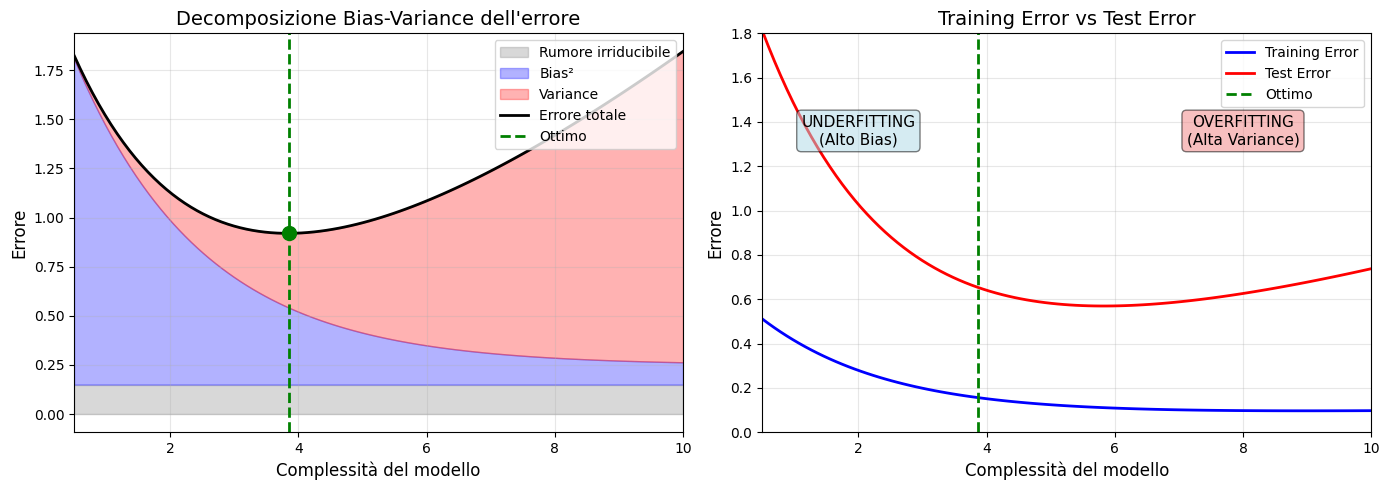


OSSERVAZIONE CHIAVE:
• A sinistra: modelli troppo semplici (alto bias, errori alti per tutti)
• A destra: modelli troppo complessi (alta variance, gap tra train e test)
• Il punto ottimale bilancia bias e variance per minimizzare l'errore totale


In [ ]:
# Visualizzazione del trade-off Bias/Variance

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Training vs Validation Score
ax1 = axes[0]
ax1.plot(list(depths), train_scores, 'b-o', linewidth=2, markersize=6, label='Training Score')
ax1.plot(list(depths), val_scores, 'r-o', linewidth=2, markersize=6, label='Validation Score')
ax1.fill_between(list(depths), 
                  np.array(val_scores) - np.array(val_stds),
                  np.array(val_scores) + np.array(val_stds),
                  alpha=0.2, color='red')

# Linea profondita ottimale
ax1.axvline(x=optimal_depth, color='green', linestyle='--', linewidth=2, label=f'Ottimo (depth={optimal_depth})')
ax1.scatter([optimal_depth], [max(val_scores)], color='green', s=150, zorder=5, marker='*')

ax1.set_xlabel('Profondita dell\'albero (max_depth)', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Training Score vs Validation Score', fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1, 20)
ax1.set_ylim(0.6, 1.05)

# Zone
ax1.axvspan(1, 3, alpha=0.1, color='blue')
ax1.axvspan(12, 20, alpha=0.1, color='red')
ax1.annotate('Underfitting', xy=(2, 0.65), fontsize=10, ha='center')
ax1.annotate('Overfitting', xy=(16, 0.65), fontsize=10, ha='center')

# Grafico 2: Gap tra Training e Validation
ax2 = axes[1]
gaps = np.array(train_scores) - np.array(val_scores)
colors = ['green' if g < 0.05 else 'orange' if g < 0.1 else 'red' for g in gaps]
ax2.bar(list(depths), gaps, color=colors, edgecolor='black', alpha=0.7)
ax2.axhline(y=0.05, color='orange', linestyle='--', label='Soglia attenzione (0.05)')
ax2.axhline(y=0.1, color='red', linestyle='--', label='Soglia overfitting (0.10)')

ax2.set_xlabel('Profondita dell\'albero (max_depth)', fontsize=12)
ax2.set_ylabel('Gap (Train - Validation)', fontsize=12)
ax2.set_title('Gap come indicatore di Overfitting', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xlim(0, 21)

plt.tight_layout()
plt.show()

print("\nOSSERVAZIONI CHIAVE:")
print("- Il training score cresce monotonamente con la profondita")
print("- Il validation score cresce, raggiunge un massimo, poi decresce")
print("- Il gap aumenta con la profondita: segnale di overfitting")
print("- A profondita alte, il modello ha memorizzato il training set")

---

## Esercizio 5: Diagnostica Completa - Confronto Modelli

In [ ]:
# === ESERCIZIO 5: Diagnostica Completa ===
# Perche: applica tutti i concetti per scegliere il modello migliore

import pandas as pd

# Definiamo i modelli da confrontare
models_diagnostic = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree (d=2)': DecisionTreeClassifier(max_depth=2, random_state=42),
    'Decision Tree (d=5)': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Decision Tree (d=20)': DecisionTreeClassifier(max_depth=20, random_state=42),
    'k-NN (k=1)': KNeighborsClassifier(n_neighbors=1),
    'k-NN (k=10)': KNeighborsClassifier(n_neighbors=10)
}

# Split per calcolare train/test accuracy
X_tr, X_te, y_tr, y_te = train_test_split(X_demo, y_demo, test_size=0.25, stratify=y_demo, random_state=42)

results_list = []

for name, model in models_diagnostic.items():
    # Addestra
    model.fit(X_tr, y_tr)
    
    # Calcola train e test accuracy
    train_acc = model.score(X_tr, y_tr)
    test_acc = model.score(X_te, y_te)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_demo, y_demo, cv=5, scoring='accuracy')
    
    results_list.append({
        'Modello': name,
        'Train': train_acc,
        'Test': test_acc,
        'Gap': train_acc - test_acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# Crea DataFrame
df_results = pd.DataFrame(results_list)

print("="*80)
print("TABELLA DIAGNOSTICA COMPLETA")
print("="*80)
print(df_results.to_string(index=False))

# Classifica i modelli
print("\n" + "="*80)
print("DIAGNOSI")
print("="*80)

for _, row in df_results.iterrows():
    name = row['Modello']
    gap = row['Gap']
    cv_std = row['CV Std']
    
    # Diagnosi
    if gap > 0.15:
        diag = "OVERFITTING GRAVE"
    elif gap > 0.08:
        diag = "OVERFITTING MODERATO"
    elif row['Train'] < 0.75:
        diag = "UNDERFITTING"
    else:
        diag = "OK"
    
    stability = "Stabile" if cv_std < 0.04 else "Instabile" if cv_std > 0.07 else "Moderato"
    
    print(f"{name:<25} -> {diag:<20} | Stabilita: {stability}")

# Identifica il migliore
best_model = df_results.loc[df_results['CV Mean'].idxmax(), 'Modello']
best_cv = df_results['CV Mean'].max()
print(f"\nMODELLO CONSIGLIATO: {best_model} (CV Mean = {best_cv:.4f})")

# --- MICRO-CHECKPOINT ---
assert len(df_results) == 6, "Devono esserci 6 modelli analizzati"
assert 'Gap' in df_results.columns, "La tabella deve contenere la colonna Gap"
print("\nMicro-checkpoint: diagnostica completa eseguita correttamente")

Dataset: 1000 campioni, 20 feature
Rumore nelle etichette: 10%

Calcolo in corso...
------------------------------------------------------------
Depth= 1 | Train=0.634 | Val=0.620±0.017 | Gap=0.014 | 📉 UNDERFITTING
Depth= 2 | Train=0.690 | Val=0.649±0.013 | Gap=0.041 | 📉 UNDERFITTING
Depth= 3 | Train=0.744 | Val=0.705±0.020 | Gap=0.039 | 📉 UNDERFITTING
Depth= 4 | Train=0.789 | Val=0.712±0.026 | Gap=0.077 | ✓ OK
Depth= 5 | Train=0.826 | Val=0.712±0.024 | Gap=0.114 | ⚠️ OVERFITTING
Depth= 6 | Train=0.856 | Val=0.686±0.029 | Gap=0.170 | ⚠️ OVERFITTING
Depth= 7 | Train=0.885 | Val=0.697±0.023 | Gap=0.188 | ⚠️ OVERFITTING
Depth= 8 | Train=0.912 | Val=0.693±0.025 | Gap=0.219 | ⚠️ OVERFITTING
Depth= 9 | Train=0.938 | Val=0.694±0.022 | Gap=0.244 | ⚠️ OVERFITTING
Depth=10 | Train=0.953 | Val=0.688±0.029 | Gap=0.265 | ⚠️ OVERFITTING
Depth=11 | Train=0.971 | Val=0.677±0.035 | Gap=0.294 | ⚠️ OVERFITTING
Depth=12 | Train=0.980 | Val=0.677±0.037 | Gap=0.303 | ⚠️ OVERFITTING
Depth=13 | Train=0.988 | 

# SEZIONE 4 - Metodi Spiegati

| Metodo/Classe | Sintassi | Descrizione |
|---------------|----------|-------------|
| `train_test_split` | `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)` | Divide dataset in train e test |
| `test_size` | `test_size=0.25` | Proporzione per il test set (25%) |
| `stratify` | `stratify=y` | Mantiene proporzioni delle classi nello split |
| `random_state` | `random_state=42` | Seed per riproducibilita |
| `cross_val_score` | `scores = cross_val_score(model, X, y, cv=5)` | Esegue K-fold cross-validation |
| `StratifiedKFold` | `cv = StratifiedKFold(n_splits=5, shuffle=True)` | K-fold stratificato per classificazione |
| `cv=5` | `cv=5` | Numero di fold per cross-validation |
| `scoring` | `scoring='accuracy'` | Metrica da usare in CV |
| `scores.mean()` | `scores.mean()` | Media dei punteggi CV |
| `scores.std()` | `scores.std()` | Deviazione standard dei punteggi CV |
| `model.score(X, y)` | `acc = model.score(X_test, y_test)` | Calcola score (accuracy per classificazione) |
| `accuracy_score` | `acc = accuracy_score(y_true, y_pred)` | Accuracy tra predizioni e valori veri |
| `max_depth` | `DecisionTreeClassifier(max_depth=5)` | Limita profondita albero (previene overfitting) |
| `n_neighbors` | `KNeighborsClassifier(n_neighbors=5)` | Numero vicini in k-NN (k basso = complesso) |

---

## Regole di Scaling con Train/Test Split

| Operazione | Corretto | Sbagliato |
|------------|----------|-----------|
| Ordine | Split PRIMA, scaling DOPO | Scaling prima dello split |
| fit() | Solo su X_train | Su tutto X |
| transform() | Su X_train e X_test | -- |

```python
# CORRETTO
X_train, X_test = train_test_split(X, ...)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

# SEZIONE 5 - Glossario

| Termine | Definizione |
|---------|-------------|
| **Generalizzazione** | Capacita del modello di fare buone previsioni su dati mai visti |
| **Training Error** | Errore calcolato sui dati di addestramento |
| **Test Error** | Errore calcolato sui dati non usati per addestrare |
| **Overfitting** | Il modello memorizza il training set invece di imparare il pattern |
| **Underfitting** | Il modello e troppo semplice per catturare il pattern |
| **Bias** | Errore sistematico dovuto alle assunzioni del modello |
| **Variance** | Sensibilita del modello al particolare training set usato |
| **Trade-off Bias/Variance** | Aumentando complessita: bias cala, variance sale |
| **Hold-out Split** | Divisione dati in train e test set |
| **Cross-Validation** | Validazione su K fold, ogni fold usato una volta come test |
| **K-Fold** | Divide dati in K parti per cross-validation |
| **Stratified** | Mantiene proporzione delle classi in ogni fold/split |
| **Data Leakage** | Informazioni dal test che contaminano il training |
| **Gap train/test** | Differenza tra accuracy train e test (segnale overfitting) |
| **Validation Set** | Dati usati per tuning iperparametri (diverso da test) |
| **Rumore irriducibile** | Variabilita intrinseca nei dati, non eliminabile |
| **Complessita** | Capacita espressiva del modello (piu parametri = piu complesso) |
| **Regolarizzazione** | Tecnica per limitare complessita e prevenire overfitting |
| **Iperparametro** | Parametro non appreso (es. max_depth, k, C) |
| **Learning Curve** | Grafico di train/val error vs dimensione training set |

# SEZIONE 6 - Errori Comuni

| N. | Errore | Problema | Soluzione |
|----|--------|----------|-----------|
| 1 | Scaling prima dello split | Data leakage: test influenza train | Split prima, poi fit() solo su train |
| 2 | Valutare solo training accuracy | Non rileva overfitting | Sempre confrontare train vs test |
| 3 | Usare test set per tuning | Il test non e piu "mai visto" | Usare validation set separato o CV |
| 4 | Ignorare il gap train/test | Non si rileva overfitting | Gap > 5-10% = problema |
| 5 | CV Std alta ignorata | Modello instabile | Preferire modelli con bassa std |
| 6 | max_depth non limitato | Decision Tree memorizza tutto | Impostare max_depth ragionevole |
| 7 | k=1 in k-NN | Overfitting estremo | Usare k >= 5 come baseline |
| 8 | Stratify non usato | Split sbilancia le classi | stratify=y in train_test_split |
| 9 | random_state mancante | Risultati non riproducibili | Sempre impostare random_state |
| 10 | Scegliere modello su train score | Scelta distorta | Scegliere su validation/CV score |

# SEZIONE 7 - Conclusione

## Cosa abbiamo imparato

In questo notebook abbiamo affrontato il problema centrale del machine learning supervisionato: costruire modelli che generalizzano.

**Concetti fondamentali:**
1. **Training Error vs Test Error**: l'unica metrica che conta e quella sui dati mai visti
2. **Overfitting**: il modello memorizza invece di imparare (train >> test)
3. **Underfitting**: il modello e troppo semplice (train e test entrambi bassi)
4. **Validazione**: tecniche per stimare la performance reale

**Tecniche apprese:**
- Hold-out split con `train_test_split`
- Cross-validation con `cross_val_score`
- Diagnostica basata sul gap train/test
- Scelta della complessita ottimale

## Collegamento alla prossima lezione

La prossima lezione introdurra i **modelli basati su alberi** (Decision Trees, Random Forest, Gradient Boosting), dove i concetti di validazione e overfitting sono cruciali per ottenere buone performance.

## Formula chiave

$$\text{Test Error} = \text{Bias}^2 + \text{Variance} + \text{Rumore}$$

L'obiettivo e trovare il punto di equilibrio che minimizza l'errore totale.

# SEZIONE 8 - Checklist di Verifica

## Concetti teorici
- [ ] So spiegare la differenza tra training error e test error
- [ ] Capisco perche l'accuracy sul training non basta
- [ ] So definire overfitting e underfitting
- [ ] Comprendo il trade-off bias/variance
- [ ] So cosa significa generalizzazione

## Tecniche di validazione
- [ ] So usare train_test_split con stratify e random_state
- [ ] Capisco perche lo split va fatto PRIMA dello scaling
- [ ] So usare cross_val_score per K-fold CV
- [ ] Capisco cosa significano media e std della CV
- [ ] So quando usare StratifiedKFold

## Diagnostica
- [ ] So riconoscere overfitting dal gap train/test
- [ ] So riconoscere underfitting da train e test entrambi bassi
- [ ] Capisco cosa indica una CV std alta
- [ ] So scegliere il modello migliore basandomi su CV score

## Prevenzione overfitting
- [ ] So che max_depth limita la complessita di Decision Tree
- [ ] So che k maggiore in k-NN significa modello piu semplice
- [ ] Conosco le strategie anti-overfitting: regolarizzazione, piu dati, ensemble

## Errori da evitare
- [ ] Non faccio scaling prima dello split
- [ ] Non scelgo il modello basandomi solo sul training score
- [ ] Non ignoro il gap tra train e test
- [ ] Uso sempre random_state per riproducibilita

## Competenze pratiche
- [ ] So creare una tabella diagnostica con train, test, gap, CV mean, CV std
- [ ] So interpretare i risultati e scegliere il modello migliore
- [ ] So giustificare la scelta con argomenti di generalizzazione

# SEZIONE 9 - Changelog

| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | 2025-01-02 | Ristrutturazione completa con template a 9 sezioni |
| 1.0 | 2025-01-02 | Rimozione emoji |
| 1.0 | 2025-01-02 | Consolidamento teoria in SEZIONE 1 (8 sottosezioni) |
| 1.0 | 2025-01-02 | Aggiunta mappa mentale con flow decisionale |
| 1.0 | 2025-01-02 | 5 esercizi dimostrativi con micro-checkpoint |
| 1.0 | 2025-01-02 | Aggiunta tabella metodi con sintassi |
| 1.0 | 2025-01-02 | Glossario 20 termini |
| 1.0 | 2025-01-02 | 10 errori comuni documentati |
| 1.0 | 2025-01-02 | Checklist di verifica completa |